In [4]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

## Import Digits

### Load labels train & test

In [2]:
y_train = np.loadtxt("../train_labels.txt",dtype=str)
y_test = np.loadtxt("../test_labels.txt",dtype=str)

### Load data train & test

In [5]:
filenames_train = [x for x in os.listdir("../train_voyelles") if x[0]=="v"]
filenames_train.sort()
filenames_test = [x for x in os.listdir("../test_voyelles") if x[0]=="v"]
filenames_test.sort()

In [6]:
x_train = []
for f in filenames_train:
  input = np.loadtxt("../train_voyelles/"+f, dtype='i', delimiter='\t')
  x_train.append(input)
x_train = np.asarray(x_train)

In [7]:
x_test = []
for f in filenames_test:
  input = np.loadtxt("../test_voyelles/"+f, dtype='i', delimiter='\t')
  x_test.append(input)
x_test = np.asarray(x_test)

In [8]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4500, 18, 18)
(4500,)
(500, 18, 18)
(500,)


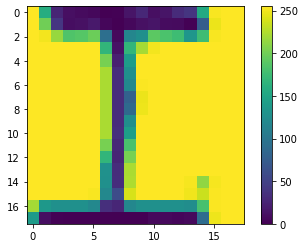

In [9]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

## Neural Network for images classification

### Preprocess train and test labels

In [45]:
train_labels = ['A', 'E', 'I', 'O', 'U'] 
# We follow the alphabetic order : A:0, E:1, I:2, O:3, U:4

In [15]:
y_train_numeric = [0 if elem == 'A' else 1 if elem == 'E' else 2 if elem == 'I' else 3 if elem == 'O' else 4 for elem in y_train]

In [22]:
y_test_numeric = [0 if elem == 'A' else 1 if elem == 'E' else 2 if elem == 'I' else 3 if elem == 'O' else 4 for elem in y_test]

### Preprocess training set and test set

In [10]:
x_train = x_train / 255.0

x_test = x_test / 255.0

### Setup Neural Network

In [28]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(18, 18)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

### Compile Model

In [29]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Train Model

In [30]:
model.fit(x_train, np.asarray((y_train_numeric)), epochs=10)

Epoch 1/10
141/141 [==============================] - 1s 1ms/step - loss: 1.0473 - accuracy: 0.6560
Epoch 2/10
141/141 [==============================] - 0s 1ms/step - loss: 0.5301 - accuracy: 0.8520
Epoch 3/10
141/141 [==============================] - 0s 1ms/step - loss: 0.4370 - accuracy: 0.8711
Epoch 4/10
141/141 [==============================] - 0s 2ms/step - loss: 0.3798 - accuracy: 0.8860
Epoch 5/10
141/141 [==============================] - 0s 2ms/step - loss: 0.3439 - accuracy: 0.8953
Epoch 6/10
141/141 [==============================] - 0s 2ms/step - loss: 0.3255 - accuracy: 0.9011
Epoch 7/10
141/141 [==============================] - 0s 1ms/step - loss: 0.3133 - accuracy: 0.9078
Epoch 8/10
141/141 [==============================] - 0s 1ms/step - loss: 0.2901 - accuracy: 0.9127
Epoch 9/10
141/141 [==============================] - 0s 1ms/step - loss: 0.2936 - accuracy: 0.9131
Epoch 10/10
141/141 [==============================] - 0s 2ms/step - loss: 0.2734 - accuracy: 0.9187

### Evaluate Model Performance

In [31]:
test_loss, test_acc = model.evaluate(x_test, np.asarray((y_test_numeric)), verbose=2)

print('\nTest accuracy:', test_acc)

16/16 - 0s - loss: 0.2766 - accuracy: 0.9220 - 121ms/epoch - 8ms/step

Test accuracy: 0.921999990940094


### Test performance

In [34]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [35]:
predictions = probability_model.predict(x_test)

In [36]:
predictions[0]

array([3.7244160e-04, 6.3381284e-02, 9.2202479e-01, 1.1860826e-02,
       2.3504333e-03, 2.4933040e-06, 1.7063232e-06, 1.0705050e-06,
       1.6833219e-06, 3.3028546e-06], dtype=float32)

In [39]:
np.argmax(predictions[0])

2

In [42]:
y_test_numeric[0]

2

In [48]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(train_labels[predicted_label],
                                100*np.max(predictions_array),
                                train_labels[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

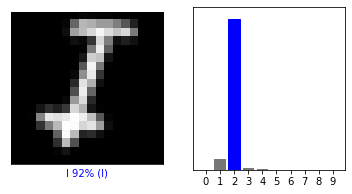

In [52]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test_numeric, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test_numeric)
plt.show()

### Some errors

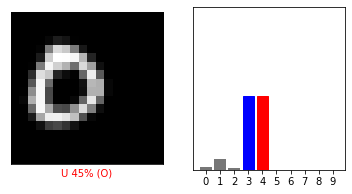

In [58]:
i = 6
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test_numeric, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test_numeric)
plt.show()

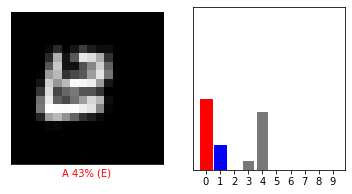

In [60]:
i = 8
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test_numeric, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test_numeric)
plt.show()

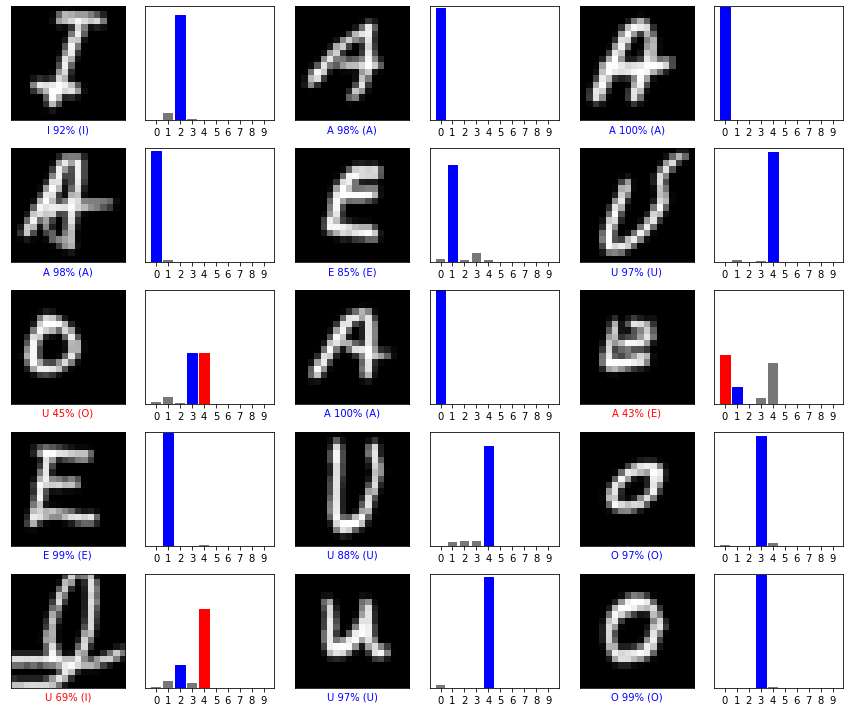

In [62]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test_numeric, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test_numeric)
plt.tight_layout()
plt.show()

### Confusion Matrix

In [63]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [68]:
def get_preds(predictions, class_labels):
    labelled_predictions = []
    for preds in predictions:
        max_pred = np.argmax(preds)
        label = class_labels[max_pred]
        labelled_predictions.append(label)
    return labelled_predictions

In [69]:
preds = get_preds(predictions, train_labels)

In [75]:
cm = confusion_matrix(y_test, preds, labels=['A', 'E', 'I', 'O', 'U'])

In [76]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['A', 'E', 'I', 'O', 'U'])

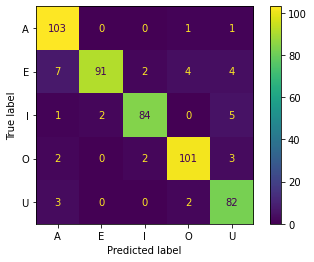

In [77]:
disp.plot()

## Convolutionnal Neural Network for images classification

In [78]:
from tensorflow.keras import datasets, layers, models

In [90]:
x_train.shape

(4500, 18, 18)

### Model Architecture

In [93]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(18, 18, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [94]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 16, 16, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 6, 6, 64)          18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 3, 3, 64)         0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 1, 1, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-trai

### Add dense layer for classification

In [95]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [96]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 16, 16, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 6, 6, 64)          18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 3, 3, 64)         0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 1, 1, 64)          36928     
                                                                 
 flatten_3 (Flatten)         (None, 64)               

### Compile Model 

In [97]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Train Model

In [104]:
history = model.fit(x_train, np.asarray((y_train_numeric)), epochs=10, 
                    validation_data=(x_test, np.asarray((y_test_numeric))))

Epoch 1/10
141/141 [==============================] - 1s 8ms/step - loss: 1.1125 - accuracy: 0.5976 - val_loss: 0.2622 - val_accuracy: 0.9380
Epoch 2/10
141/141 [==============================] - 1s 7ms/step - loss: 0.1904 - accuracy: 0.9409 - val_loss: 0.1064 - val_accuracy: 0.9640
Epoch 3/10
141/141 [==============================] - 1s 8ms/step - loss: 0.1108 - accuracy: 0.9662 - val_loss: 0.0839 - val_accuracy: 0.9720
Epoch 4/10
141/141 [==============================] - 1s 7ms/step - loss: 0.0847 - accuracy: 0.9744 - val_loss: 0.0787 - val_accuracy: 0.9860
Epoch 5/10
141/141 [==============================] - 1s 7ms/step - loss: 0.0662 - accuracy: 0.9818 - val_loss: 0.0589 - val_accuracy: 0.9820
Epoch 6/10
141/141 [==============================] - 1s 7ms/step - loss: 0.0555 - accuracy: 0.9849 - val_loss: 0.0588 - val_accuracy: 0.9860
Epoch 7/10
141/141 [==============================] - 1s 7ms/step - loss: 0.0398 - accuracy: 0.9889 - val_loss: 0.0500 - val_accuracy: 0.9820
Epoch 

### Evaluate the model

16/16 - 0s - loss: 0.0519 - accuracy: 0.9820 - 122ms/epoch - 8ms/step


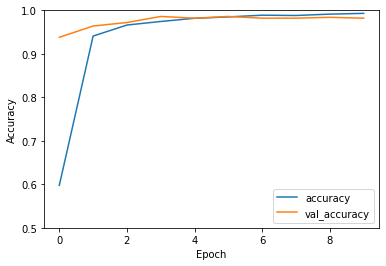

In [106]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  np.asarray((y_test_numeric)), verbose=2)

In [107]:
print(test_acc)

0.9819999933242798


In [108]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [109]:
predictions = probability_model.predict(x_test)

In [110]:
predictions[0]

array([2.0974012e-06, 1.2144061e-04, 9.9986970e-01, 2.2403867e-06,
       4.3621976e-06, 6.7498040e-10, 1.3023748e-09, 8.5906301e-08,
       1.5094318e-07, 6.9585462e-09], dtype=float32)

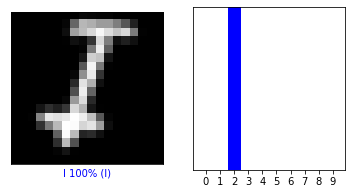

In [111]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test_numeric, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test_numeric)
plt.show()

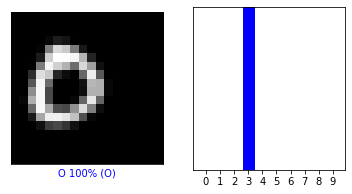

In [112]:
i = 6
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test_numeric, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test_numeric)
plt.show()

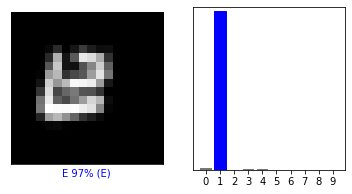

In [113]:
i = 8
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test_numeric, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test_numeric)
plt.show()

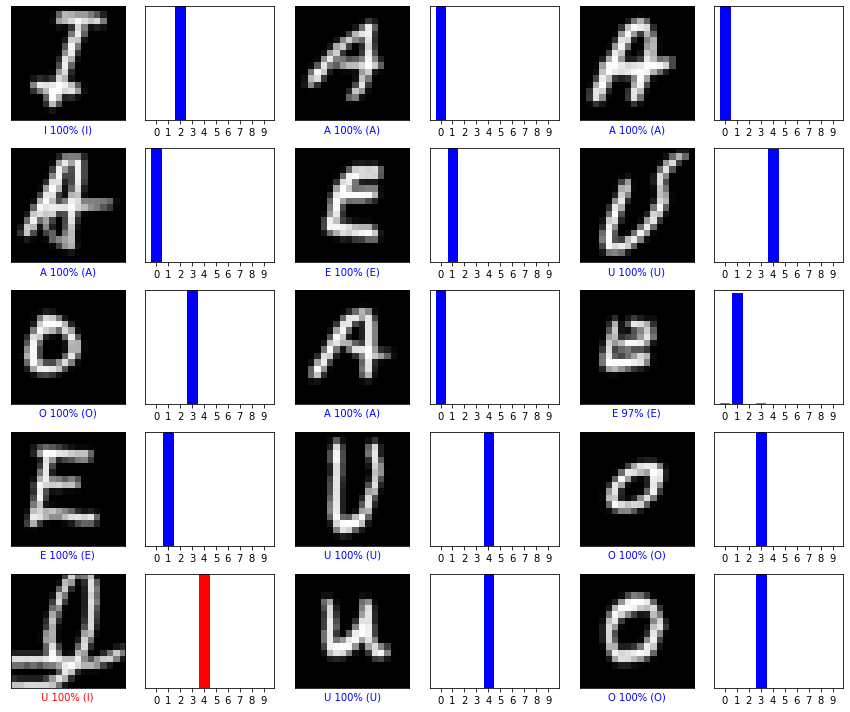

In [114]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test_numeric, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test_numeric)
plt.tight_layout()
plt.show()

In [115]:
preds = get_preds(predictions, train_labels)

In [116]:
cm = confusion_matrix(y_test, preds, labels=['A', 'E', 'I', 'O', 'U'])

In [117]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['A', 'E', 'I', 'O', 'U'])

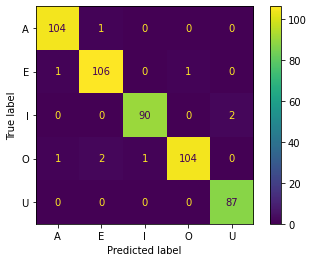

In [118]:
disp.plot()